# COURSERA IBM MACHINE LEARNING CERTIFICATION
## Léa Zurfluh - Mar 2021
### End of module project: Supervised Learning - Classification

Aim of project is to train a few classification models on a chosen dataset and present insights to senior audience.

Data set chosen: Gender Pay Gap.
Same data set as the one I chose for the Linear Regression project, available [here](https://github.com/LeaZurfluh/ibm-ml-linear-regression). Initial Data Cleaning, Feature Engineering and Exploratory Data Analysis have been performed in that Linear Regression project and will not be repeated in this Jupyter notebook.


## 1. Brief description of the data set and a summary of its attributes

This Gender Pay Gap data set has been published by Glassdoor and is available [here](https://www.glassdoor.com/research/how-to-analyze-gender-pay-gap-employers-guide/#).
This data set exposes pay and bonus for some characteristics, including gender (see full list of characteristics below). This information comes from a salary survey done in 2019 in the U.S.

1000 rows.

|   |Column attribute |Type  |Comment |
| - | ------- | ------------ | ---- |
| 0	| JobTitle  | object |Ex: Software Engineer  |
| 1	| Gender  | object  |Binary: Male or Female  |
| 2	| Age  | int64  | From 18 to 65  |
| 3	| PerfEval  | int64  |How the employee performs out of 5  |
| 4	| Education  | object  |Highest diploma  |
| 5	| Dept  | object  |Department. Ex: Sales  |
| 6	| Seniority  | int64  |Level of seniority of employee out of 5  |
| 7	| BasePay  | int64  |Annual base salary in USD  |
| 8	| Bonus  | int64  |Annual bonus in USD  |

Let's try to predict Gender with all the other available features.


## 2. Data exploration
### I. Data cleaning / Feature engineering / Exploratory Data Analysis
See [Linear Regression project](https://github.com/LeaZurfluh/ibm-ml-linear-regression).

### II. Classification models to predict gender
##### II.a. K-Nearest Neighbours with hyperparameter tuning
##### II.b. Random Forest classification
##### II.c. AdaBoost
##### II.d. Model comparison

### III. Conclusion

## <font color = 'blue'> 1. Get the data </font>

In [62]:
### IMPORTS ###
import pandas as pd
import numpy as np
import math
# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing & metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, f1_score, roc_auc_score, roc_curve, precision_recall_curve
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
# Random Forests
from sklearn.ensemble import RandomForestClassifier
# AdaBoost
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

### VARIABLES ###
FILE = 'Glassdoor Gender Pay Gap.csv'

In [2]:
# Store data set in dataframe
df = pd.read_csv('data' + FILE)
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


## <font color = 'blue'> 2. Data Exploration </font>
### <font color = 'blue'>II. Classification models to predict gender </font>
#### <font color = 'blue'>II.a. K-Nearest Neighbours </font>

The KNN algorithm is based on distance, hence we need to scale our features.

In [4]:
# Let's define the type of our variables first.
# DataFrame that has the name of the feature and the number of unique values:
df_uniques = pd.DataFrame([[i, len(df[i].unique())] for i in df.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
JobTitle,10
Gender,2
Age,48
PerfEval,5
Education,4
Dept,5
Seniority,5
BasePay,992
Bonus,941


In [5]:
# Let's divide all of our variables in binary / ordinal / categorical / numerical variables so that 
# it is easier to take care of each category separately.

# Binary variables
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)

# Ordinal variables
ordinal_variables = ['PerfEval', 'Seniority', 'Education', 'Age']

# Categorical variables
categorical_variables = list(set(list(df_uniques[(10 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)) - set(ordinal_variables))

# Numerical variables
numeric_variables = list(set(df.columns) - set(ordinal_variables) - set(categorical_variables) - set(binary_variables))

print('The binary variables are: {}'.format(binary_variables))
print('The ordinal variables are: {}'.format(ordinal_variables))
print('The categorical variables are: {}'.format(categorical_variables))
print('The numeric variables are: {}'.format(numeric_variables))

The binary variables are: ['Gender']
The ordinal variables are: ['PerfEval', 'Seniority', 'Education', 'Age']
The categorical variables are: ['Dept', 'JobTitle']
The numeric variables are: ['BasePay', 'Bonus']


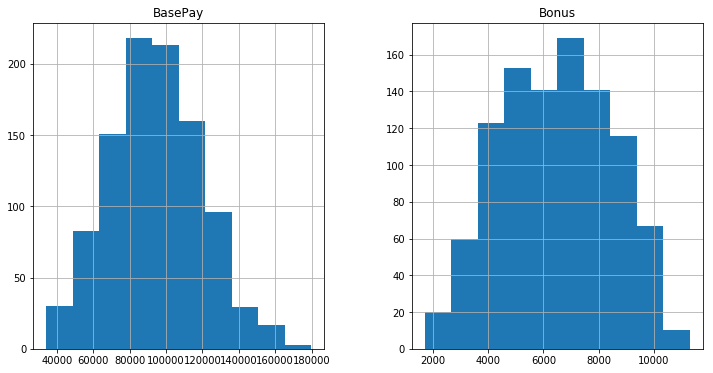

In [6]:
df[numeric_variables].hist(figsize=(12, 6));

In [7]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
lb, le = LabelBinarizer(), LabelEncoder()

In [8]:
round(df[ordinal_variables].describe(),1)

,PerfEval,Seniority,Age
count,1000.0,1000.0,1000.0
mean,3.0,3.0,41.4
std,1.4,1.4,14.3
min,1.0,1.0,18.0
25%,2.0,2.0,29.0
50%,3.0,3.0,41.0
75%,4.0,4.0,54.2
max,5.0,5.0,65.0


In [9]:
# Out of the 4 categorical variables, 3 are already encoded as integers. Only Education is not:
edu = {'High School':0, 'College':1, 'Masters':2, 'PhD':3}
df.Education = df.Education.map(edu)

In [10]:
# Transform Gender
for column in binary_variables:
    df[column] = lb.fit_transform(df[column])

In [11]:
lb.classes_

array(['Female', 'Male'], dtype='<U6')

In [12]:
# Transform categorical variables
df = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

In [13]:
df.head()

,Gender,Age,PerfEval,Education,Seniority,BasePay,Bonus,Dept_Engineering,Dept_Management,Dept_Operations,Dept_Sales,JobTitle_Driver,JobTitle_Financial Analyst,JobTitle_Graphic Designer,JobTitle_IT,JobTitle_Manager,JobTitle_Marketing Associate,JobTitle_Sales Associate,JobTitle_Software Engineer,JobTitle_Warehouse Associate
0,0,18,5,1,2,42363,9938,0,0,1,0,0,0,1,0,0,0,0,0,0
1,1,21,5,1,5,108476,11128,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,19,4,3,5,90208,9268,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,20,5,2,4,108080,10154,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,26,5,2,5,99464,9319,1,0,0,0,0,0,1,0,0,0,0,0,0


In [14]:
mm = MinMaxScaler()
for column in [ordinal_variables + numeric_variables]:
    df[column] = mm.fit_transform(df[column])

round(df.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
Gender,1000.0,0.532,0.499,0.0,0.000,1.000,1.000,1.0
Age,1000.0,0.498,0.304,0.0,0.234,0.489,0.771,1.0
PerfEval,1000.0,0.509,0.356,0.0,0.250,0.500,0.750,1.0
Education,1000.0,0.489,0.374,0.0,0.000,0.333,0.667,1.0
Seniority,1000.0,0.493,0.349,0.0,0.250,0.500,0.750,1.0
BasePay,1000.0,0.414,0.174,0.0,0.293,0.406,0.532,1.0
Bonus,1000.0,0.497,0.209,0.0,0.328,0.501,0.659,1.0
Dept_Engineering,1000.0,0.192,0.394,0.0,0.000,0.000,0.000,1.0
Dept_Management,1000.0,0.198,0.399,0.0,0.000,0.000,0.000,1.0
Dept_Operations,1000.0,0.210,0.408,0.0,0.000,0.000,0.000,1.0


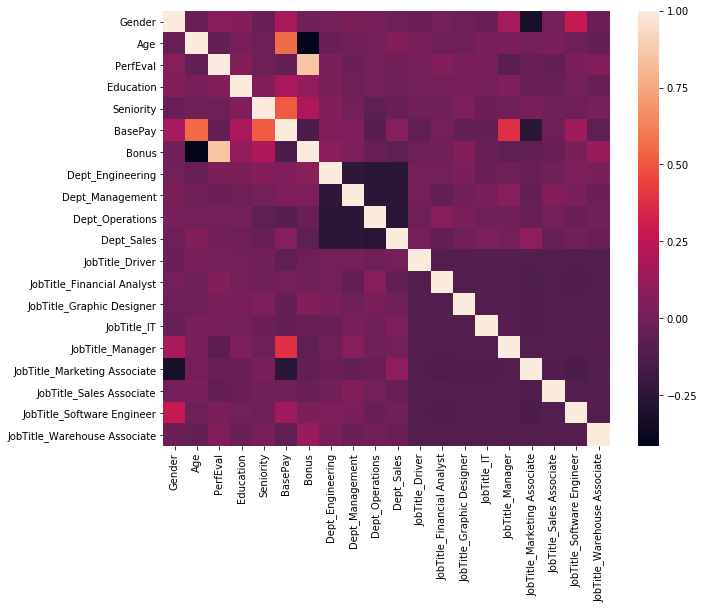

In [15]:
# Now that all variables are encoded and scaled, let's take a look at the correlation matrix
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(df.corr());

Interestingly, Gender is quite negatively correlated with being a Marketing Associate. As 'Female' = 'False' we can conclude that there are more Female Marketing Associates.

Similarly, Gender is positively correlated with being a Software Engineer: there are more Male Software Engineers.

Now let's run a KNN model with hyperparameter tuning in order to find the best K leading to the highest F1 score.

In [63]:
# Set up X and y variables
y, X = df['Gender'], df.drop(columns='Gender')
# Split the data into training and test samples
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.3, random_state=7879) #K-Nearest Neighbors
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=7879) #Random Forests
X_train_abc, X_test_abc, y_train_abc, y_test_abc = train_test_split(X, y, test_size=0.3, random_state=7879) #AdaBoost

In [18]:
# Hyperparameter tuning - identify the best K
max_k = 70
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train_knn, y_train_knn)
    
    y_pred_knn = knn.predict(X_test_knn)
    f1 = f1_score(y_pred_knn, y_test_knn)
    f1_scores.append((k, round(f1_score(y_test_knn, y_pred_knn), 4)))
    error = 1-round(accuracy_score(y_test_knn, y_pred_knn), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

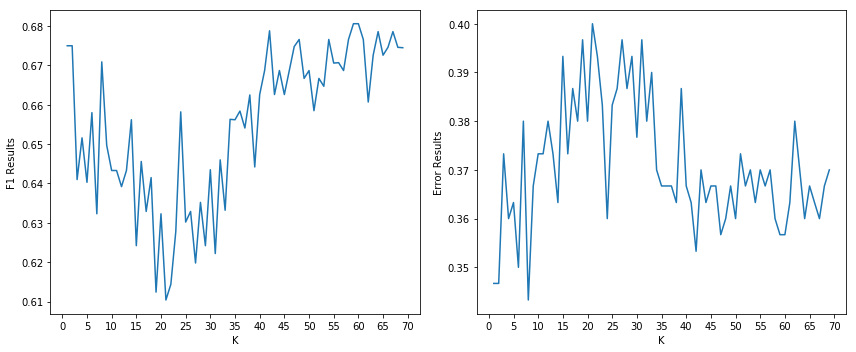

In [19]:
# Plotting F1 and Error Rate for each K
metrics = [f1_results, error_results]
metrics_names = ['F1 Results', 'Error Results']
fig, axes = plt.subplots(1, 2,figsize=(12,5))

for i, (ax, metric) in enumerate(zip(axes.flatten(), metrics)):
    ax.plot(metric.set_index('K'))
    ax.set(xlabel='K', ylabel=metrics_names[i])
    ax.set_xticks(range(0, max_k+1, 5))
    plt.tight_layout();

In [20]:
# Confirming what we see visually by finding the highest F1 and lowest error:
max_f1 = f1_results['F1 Score'].max()
best_k_f1 = min(f1_results[f1_results['F1 Score'] == max_f1]['K'])
print('The highest F1 is {:.2f} for K ={}'.format(max_f1, best_k_f1))

min_error = error_results['Error Rate'].min()
best_k_err = min(error_results[error_results['Error Rate'] == min_error]['K'])
print('The lowest error is {:.2f} for K ={}'.format(min_error, best_k_err))

best_k = best_k_f1

The highest F1 is 0.68 for K =59
The lowest error is 0.34 for K =8


Visually, varying K seems to lead to volatile F1 and errors. Let's take K=59 for the next part of our analysis.
Now we can output precision and recall to understand how good the classification model is.


In [21]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=int(best_k))
knn = knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_test_knn)
# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test_knn, y_pred_knn))
print('Accuracy score: ', round(accuracy_score(y_test_knn, y_pred_knn), 2))
print('F1 Score: ', round(f1_score(y_test_knn, y_pred_knn), 2))

              precision    recall  f1-score   support

           0       0.64      0.52      0.57       145
           1       0.62      0.72      0.66       155

    accuracy                           0.62       300
   macro avg       0.63      0.62      0.62       300
weighted avg       0.63      0.62      0.62       300

Accuracy score:  0.62
F1 Score:  0.66


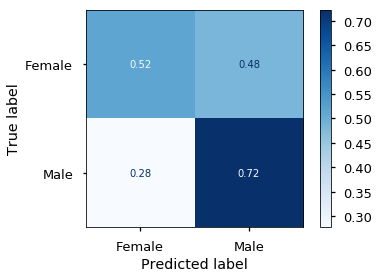

In [44]:
# Plot confusion matrix
plot_confusion_matrix(knn, X_test_knn, y_test_knn,
                                 display_labels=['Female', 'Male'],
                                 cmap=plt.cm.Blues,
                                 normalize='true');


The LabelBinarizer from sklearn gives us which label corresponds to which boolean. In this case, Female = False and Male = True. The confusion matrix above shows that the model predicts gender better than random guessing (for which accuracy would have been 53% as there are 53% Males). Let's try other classification models to see if we can gain any improvement on the prediction front.


#### <font color = 'blue'>II.b. Random Forest </font>

Lets run a Random Forest algorithm for different number of trees, and plot its out of bag ('oob') error. The number of trees leading to the lowest oob error will then be taken as the best one for this analysis.

In [23]:
# Suppress warnings about too few trees from the early models
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

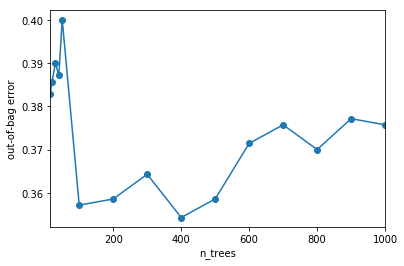

In [24]:
# Initialize the random forest estimator
# Note that the number of trees is not setup here
RF = RandomForestClassifier(oob_score=True, 
                            random_state=7879, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = list()
tree_list = [15, 20, 30, 40, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

# Iterate through all of the possibilities for 
# number of trees
for n_trees in tree_list:
    
    # Use this to set the number of trees
    RF.set_params(n_estimators=n_trees)

    # Fit the model
    RF.fit(X_train_rf, y_train_rf)

    # Get the oob error
    oob_error = 1 - RF.oob_score_
    
    # Store it
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

ax = rf_oob_df.plot(legend=False, marker='o')
ax.set(ylabel='out-of-bag error');

The best number of trees seems to be 400, let's keep this value for the next part.

In [27]:
# Random forest with 500 estimators
model = RF.set_params(n_estimators=400)
y_pred_rf = model.predict(X_test_rf)

cr = classification_report(y_test_rf, y_pred_rf)
print(cr)

score_df = pd.DataFrame({'accuracy': accuracy_score(y_test_rf, y_pred_rf),
                         'precision': precision_score(y_test_rf, y_pred_rf),
                         'recall': recall_score(y_test_rf, y_pred_rf),
                         'f1': f1_score(y_test_rf, y_pred_rf),
                         'auc': roc_auc_score(y_test_rf, y_pred_rf)},
                         index=pd.Index([0]))

print(score_df)

              precision    recall  f1-score   support

           0       0.64      0.60      0.62       145
           1       0.64      0.68      0.66       155

    accuracy                           0.64       300
   macro avg       0.64      0.64      0.64       300
weighted avg       0.64      0.64      0.64       300

   accuracy  precision    recall        f1      auc
0      0.64   0.644172  0.677419  0.660377  0.63871


Accuracy is better for random forests (0.64) than KNN (0.62)

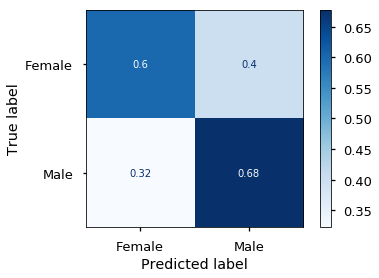

In [45]:
# Plot confusion matrix
plot_confusion_matrix(model, X_test_rf, y_test_rf,
                                 display_labels=['Female', 'Male'],
                                 cmap=plt.cm.Blues,
                                 normalize='true');

The normalised confusion matrix shows Random Forest model is better at predicting the 'Female' category than KNN (60% correct predictions of this category, against only 52% for KNN). However it is a tiny bit worse at predicting the 'Male' category, with 68% accurate predictions against 72% for KNN.

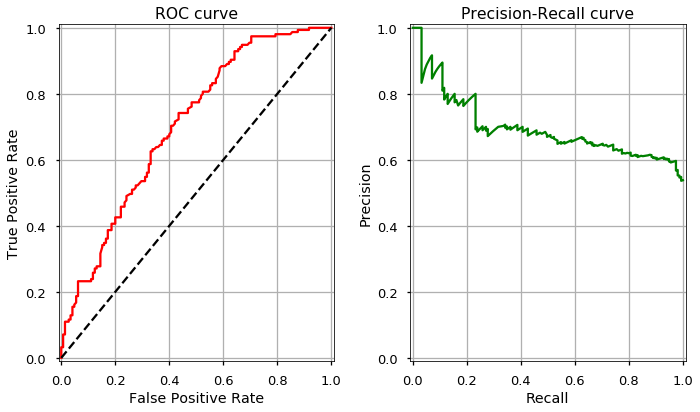

In [29]:
# Visualise the ROC curve and the precision-recall curve for Random Forests
sns.set_context('talk')

fig, axList = plt.subplots(ncols=2)
fig.set_size_inches(10, 6)

# Get the probabilities for each of the two categories
y_prob = model.predict_proba(X_test_rf)

# Plot the ROC curve
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test_rf, y_prob[:,1])
ax.plot(fpr, tpr, color='red')
# It is customary to draw a diagonal dotted line in ROC plots.
# This is to indicate completely random prediction. Deviation from this
# dotted line towards the upper left corner signifies the power of the model.
ax.plot([0, 1], [0, 1], ls='--', color='black')
ax.set(xlabel='False Positive Rate',
       ylabel='True Positive Rate',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='ROC curve')
ax.grid(True)

# Plot the precision-recall curve
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test_rf, y_prob[:,1])
ax.plot(recall, precision, color='green')
ax.set(xlabel='Recall', ylabel='Precision',
       xlim=[-.01, 1.01], ylim=[-.01, 1.01],
       title='Precision-Recall curve')
ax.grid(True)

plt.tight_layout()

The ROC curve, or Receiver Operating Characteristic curve, show how good a model is if the curve is really close to the top-left corner. The diagonal dotted line represents random guessing. In this case, the model does a better job than random guessing without being tremendous.

In [30]:
model.feature_importances_

array([0.1437534 , 0.05939352, 0.06328773, 0.06707181, 0.16825116,
       0.16429782, 0.01797116, 0.02038828, 0.01806367, 0.02070009,
       0.0150786 , 0.01604827, 0.01475817, 0.01542034, 0.03264775,
       0.06828246, 0.01530344, 0.06427067, 0.01501169])

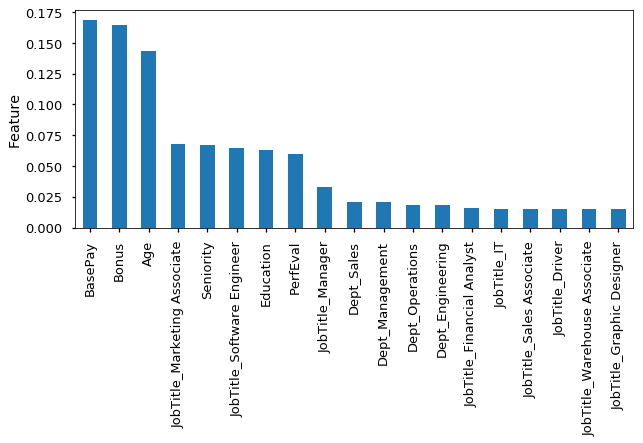

In [31]:
feature_cols = X_test_rf.columns
feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

ax = feature_imp.plot(kind='bar', figsize=(10, 4))
ax.set(ylabel='Relative Importance');
ax.set(ylabel='Feature');

Random forest seems to perform a bit better than KNN since accuracy is better (0.64 instead of 0.62). Confusion matrices show Random Forest predicts a bit better the 'Female' output.

Examination of the feature importance confirms BasePay and Bonus, alongside Age, are the most important features in predicting Gender - which corroborates the fact that there is a remuneration difference between genders.

To a lesser extent, feature importance confirms what we visually spotted looking at the correlation matrix, i.e. the relatively high correlation of Gender with JobTitle_Marketing Associate and JobTitle_Software Engineer. 

#### <font color = 'blue'>II.c. AdaBoost </font>

Now, let's compare those two results with a last model, Adaptive Boosting (AdaBoost), combined with Grid Search CV, to see if we can improve our model even more.

In [64]:
# Tree_list has been defined when doing hyperparameter tuning for Random Forests above.
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001]

ABC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

param_grid = {'n_estimators': tree_list,
              'learning_rate': learning_rates}

GV_ABC = GridSearchCV(ABC,
                      param_grid=param_grid, 
                      scoring='accuracy',
                      n_jobs=-1)

GV_ABC = GV_ABC.fit(X_train_abc, y_train_abc)

In [65]:
# The best model
GV_ABC.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1, n_estimators=200)

In [66]:
y_pred_abc = GV_ABC.predict(X_test_abc)
print(classification_report(y_pred_abc, y_test_abc))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       138
           1       0.70      0.67      0.69       162

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300



We can see a better accuracy of 0.67, compared with 0.64 for Random Forests.


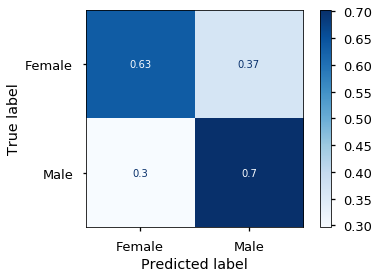

In [67]:
# Plot confusion matrix
plot_confusion_matrix(GV_ABC, X_test_abc, y_test_abc,
                                 display_labels=['Female', 'Male'],
                                 cmap=plt.cm.Blues,
                                 normalize='true');

The confusion matrix reflects the superiority of AdaBoost compared to Random Forests: it is better at predicting the 'Male' label (70% of true 'Male' are predicted as such vs. 68% for Random Forests), and also better at predicting the 'Female' one (63% compared to 60% for Random Forests)


### <font color = 'blue'>III. Conclusion </font>
##### <font color = 'blue'> III.a. Summary </font>

The aim of this project was to find the best model to predict Gender on our data set. 
1. First, I took a look at K-Nearest Neighbours algorithm, because the aim of this project was not coefficient interpretability which cannot be done with KNN. We found the best number of neighbours to use was 59, and the model gave an accuracy of 62% and an F1 score of 67%.
2. Then, I ran a Random Forest model with 400 trees. This led to better accuracy (64%) and a similar F1.
3. This random forest model allows us to take a look at feature importance, which confirms the impact of Salary, Bonus and being a Marketing associate or a Software engineer in predicting Gender.
4. Finally, I ran AdaBoost with Grid Search CV to further improve accuracy (67%) with, again, a similar F1 to the other 2 models.

<b> Given the increase in accuracy we see with AdaBoost, this is the validated model for predicting Gender with this data set.</b>

Also as mentioned at the top of this paper, the data set was published cleaned and might not be representative of the population - those prediction models are thus to be taken with caution.


##### <font color = 'blue'> III.b. Next steps </font>

I have chosen to use a train/test split and not cross validation: a natural next step would be to verify those results using cross validation.

Moreover I realised after writing this paper that I hadn't transformed the 'Bonus' feature so that it follows a more normal distribution (it is not skewed but seems to show some kurtosis we could potentially reduce). This could potentially further improve the prediction models.

Of course, checking if we could achieve similar results on a raw dataset that has not been cleaned beforehand or only slightly could also be interesting.